# Project: Zomato API-2

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import requests
import json

## Question 1.1

NRC Count: 7947 
Rest Count(India-NRC): 705


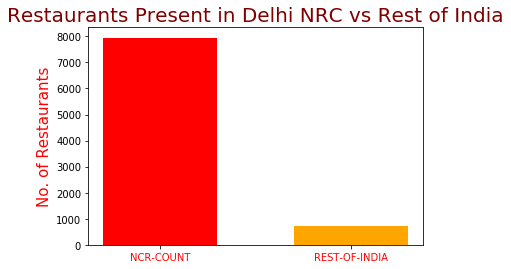

In [3]:
df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
df.dropna(inplace=True)
df.reset_index(inplace=True)
del df['index']
data_india = df[df['Country Code']==1]

def getcount(data):
    data_new_delhi=data[data['City']=='New Delhi']['City'].count()
    data_ghaziabad=data[data['City']=='Ghaziabad']['City'].count()
    data_noida=data[data['City']=='Noida']['City'].count()
    data_gurgaon=data[data['City']=='Gurgaon']['City'].count()
    data_faridabad=data[data['City']=='Faridabad']['City'].count()
    ncr_count=data_new_delhi+data_ghaziabad+data_noida+data_gurgaon+data_faridabad
    total_india=data['City'].count()
    return ncr_count,total_india-ncr_count

ncr_count,rest_count=getcount(data_india)

print('NRC Count:',ncr_count,'\nRest Count(India-NRC):',rest_count)

y=[ncr_count,rest_count]
x=['NCR-COUNT','REST-OF-INDIA']
plt.bar(x,y, color=['red','orange'], width=0.6)
plt.title('Restaurants Present in Delhi NRC vs Rest of India', fontsize=20, color='maroon')
plt.rcParams['figure.figsize'] = [10,6]
plt.ylabel('No. of Restaurants', color='red', fontsize=15)
plt.xticks(color='red')
plt.show()

## Question 1.2

In [4]:
target=['New Delhi','Ghaziabad','Faridabad','Noida','Gurgaon']
ncr_cuisines=list(data_india[(data_india['City']=='New Delhi') | (data_india['City']=='Noida')|(data_india['City']=='Ghaziabad')|(data_india['City']=='Gurgaon') | (data_india['City']=='Faridabad')]['Cuisines'])
NCR_CUISINES=[]
for ele in ncr_cuisines:
    li=[x.strip() for x in ele.split(',')]
    for i in li:
        NCR_CUISINES.append(i)
        
NCR_CUISINES=list(set(NCR_CUISINES))

rest_cuisines=list(data_india[(data_india['City']!='New Delhi') | (data_india['City']!='Noida')|(data_india['City']!='Ghaziabad')|(data_india['City']!='Gurgaon') | (data_india['City']!='Faridabad')]['Cuisines'])
REST_CUISINES_NOT_NCR=[]
for ele in rest_cuisines:
    li=[x.strip() for x in ele.split(',')]
    for y in li:
        if y not in NCR_CUISINES:
            REST_CUISINES_NOT_NCR.append(y)
print("-----------------------------------------------------------------------------------------------------")
print()
print('Cuisines that are NOT in NCR but are in rest of india are as follows : -')
print()
for ele in REST_CUISINES_NOT_NCR:
    print(ele)
print()
print("------------------------------------------------------------------------------------------------------")

TOTAL_CUISINES=NCR_CUISINES+REST_CUISINES_NOT_NCR


-----------------------------------------------------------------------------------------------------

Cuisines that are NOT in NCR but are in rest of india are as follows : -

German
Malwani
German
BBQ
Cajun

------------------------------------------------------------------------------------------------------


In [5]:
data_india[data_india['City']=='New Delhi']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2551,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,2
2552,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,46
2553,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Orange,Average,45
2554,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,2.6,Orange,Average,11
2555,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8019,18445274,Motu N Patlu,1,New Delhi,"Batla House Chowk, Near Jamia Milia Islamia, O...",Zakir Nagar,"Zakir Nagar, New Delhi",77.285065,28.566246,"Lebanese, North Indian, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
8020,18168147,S.K. Fast Food,1,New Delhi,"161/32, Shop 3 Joga Bai, Main Road, Zakir Naga...",Zakir Nagar,"Zakir Nagar, New Delhi",77.283827,28.566189,Chinese,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
8021,18429375,Sufiyan Restaurant,1,New Delhi,"57/12, Main Road, Zakir Nagar, New Delhi",Zakir Nagar,"Zakir Nagar, New Delhi",77.279779,28.567321,Mughlai,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
8022,310479,The Relax Point,1,New Delhi,"92/17, Zakir Nagar, New Delhi",Zakir Nagar,"Zakir Nagar, New Delhi",77.278543,28.566849,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1


In [6]:
header={'Accept':'application/json','user-key':'b09fb2d583affae07ce1c729b12dc531'}
response=requests.get('https://api.zomato.com/v2.1/cities',params={'q':'delhi'},headers=header)
response=response.json()
city_id=response['location_suggestions'][0]['id']
response=requests.get('https://api.zomato.com/v2.1/cuisines',params={'city_id':city_id},headers=header)
response=response.json()
li=[]
for i in range(len(response['cuisines'])):
    li.append(response['cuisines'][i]['cuisine']['cuisine_name'])
li=set(li)
l=set(REST_CUISINES_NOT_NCR).difference(li)
print('--------------------------------------------------------------------------------------------------')
print('Cuisines which are NOT in Delhi NCR but are in rest in india by dataset through ZOMATO API are')
for ele in list(l):
    print(ele)
print('--------------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------------
Cuisines which are NOT in Delhi NCR but are in rest in india by dataset through ZOMATO API are
German
Cajun
--------------------------------------------------------------------------------------------------


In [7]:
data_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
615,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
616,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
617,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
618,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
619,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


## Question 1.3

------------------------------------------------------------------------------------------------------
Top 10 cuisines present in DELHI NCR are as follows 
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Top 10 cuisines present in REST IN INDIA are as follows 
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50
------------------------------------------------------------------------------------------------------


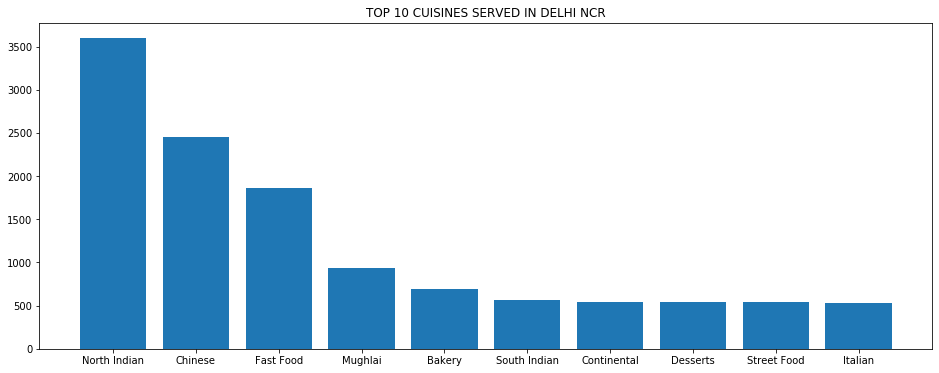

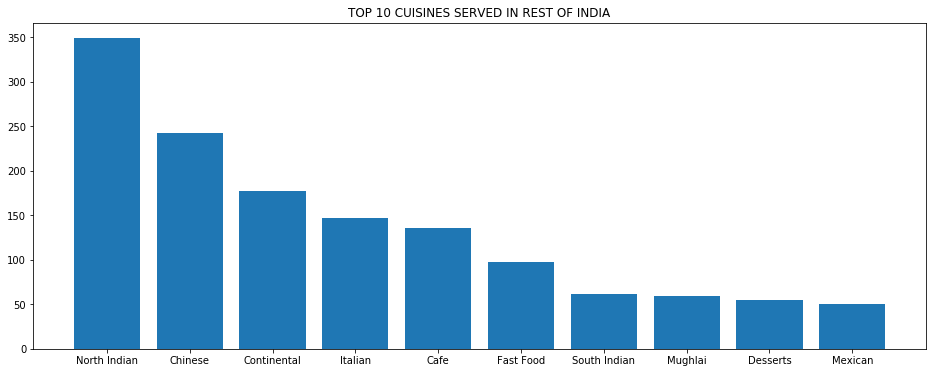

In [8]:
l=list(zip(data_india['City'],data_india['Cuisines']))
target=['New Delhi','Noida','Gurgaon','Faridabad','Ghaziabad']
d={}
for i in range(len(l)):
    if l[i][0] in target:
        for x in l[i][1].split(','):
            x=x.strip()
            d[x]=d.get(x,0)+1
d=dict(sorted(d.items(),key= lambda  kv :(kv[1],kv[0]),reverse=True))
print('------------------------------------------------------------------------------------------------------')
print('Top 10 cuisines present in DELHI NCR are as follows ')
i=0
x_ncr=[]
y_ncr=[]
for key,val in d.items():
    if i==10:
        break
    x_ncr.append(key)
    y_ncr.append(val)
    print(key,val)
    i+=1
print('------------------------------------------------------------------------------------------------------')
d={}
x_rest=[]
y_rest=[]
for i in range(len(l)):
    if l[i][0] not in target:
        for x in l[i][1].split(','):
            x=x.strip()
            d[x]=d.get(x,0)+1
d=dict(sorted(d.items(),key= lambda  kv :(kv[1],kv[0]),reverse=True))
print('------------------------------------------------------------------------------------------------------')
print('Top 10 cuisines present in REST IN INDIA are as follows ')
i=0
for key,val in d.items():
    if i==10:
        break
    x_rest.append(key)
    y_rest.append(val)
    print(key,val)
    i+=1
print('------------------------------------------------------------------------------------------------------')

plt.subplots(figsize=(16,6))
plt.title('TOP 10 CUISINES SERVED IN DELHI NCR')
plt.bar(x_ncr,y_ncr)
plt.show()

plt.subplots(figsize=(16,6))
plt.title('TOP 10 CUISINES SERVED IN REST OF INDIA')
plt.bar(x_rest,y_rest)

plt.show()


## Question 2.1.1

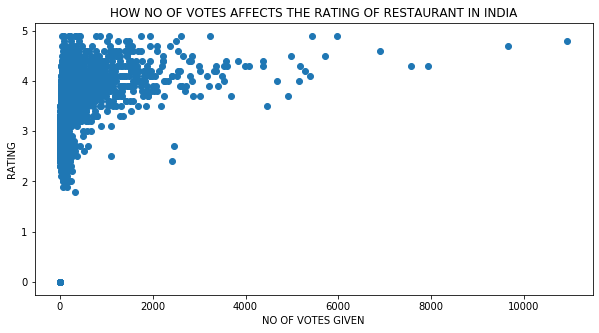

In [9]:
l=list(zip(data_india['Aggregate rating'],data_india['Votes']))
y=[ele[0] for ele in l]
x=[ele[1] for ele in l]
plt.subplots(figsize=(10,5))
plt.ylabel('RATING')
plt.xlabel('NO OF VOTES GIVEN')
plt.title('HOW NO OF VOTES AFFECTS THE RATING OF RESTAURANT IN INDIA')
plt.scatter(x,y)
plt.show()

## Question 2.1.2

C:\Users\gurpr\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


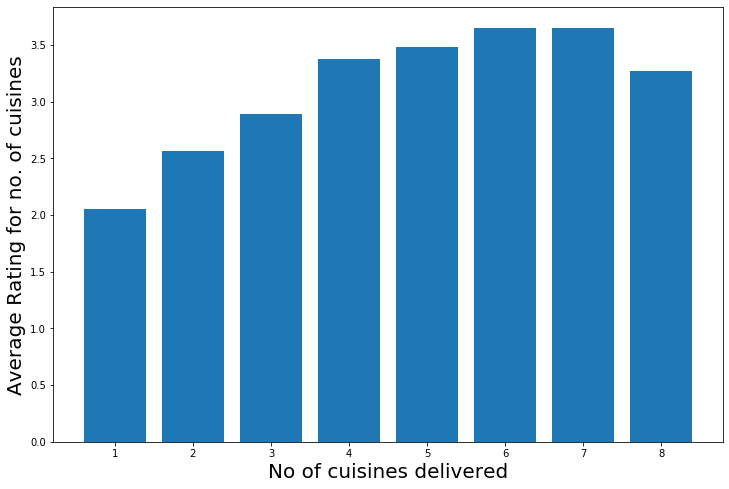

In [13]:
def f(data):
    li=data.split(',')
    return(len(li))
    

data_india['count']=data_india['Cuisines'].apply(f)
get_count=data_india['count'].value_counts()

li=list(zip(data_india['Aggregate rating'],data_india['count']))
d={}
x=[]
y=[]
for ele in li:
    if ele[1] not in d:
        d[ele[1]]=[ele[0]]
    else:
        d[ele[1]].append(ele[0])
for key in d:
    d[key]=sum(d[key])/len(d[key])
for key in d:
    x.append(key)
    y.append(d[key])
plt.subplots(figsize=(12,8))
plt.xlabel('No of cuisines delivered', fontsize=20)
plt.ylabel('Average Rating for no. of cuisines', fontsize=20)
plt.bar(x,y)
plt.show()

## Question 2.1.3

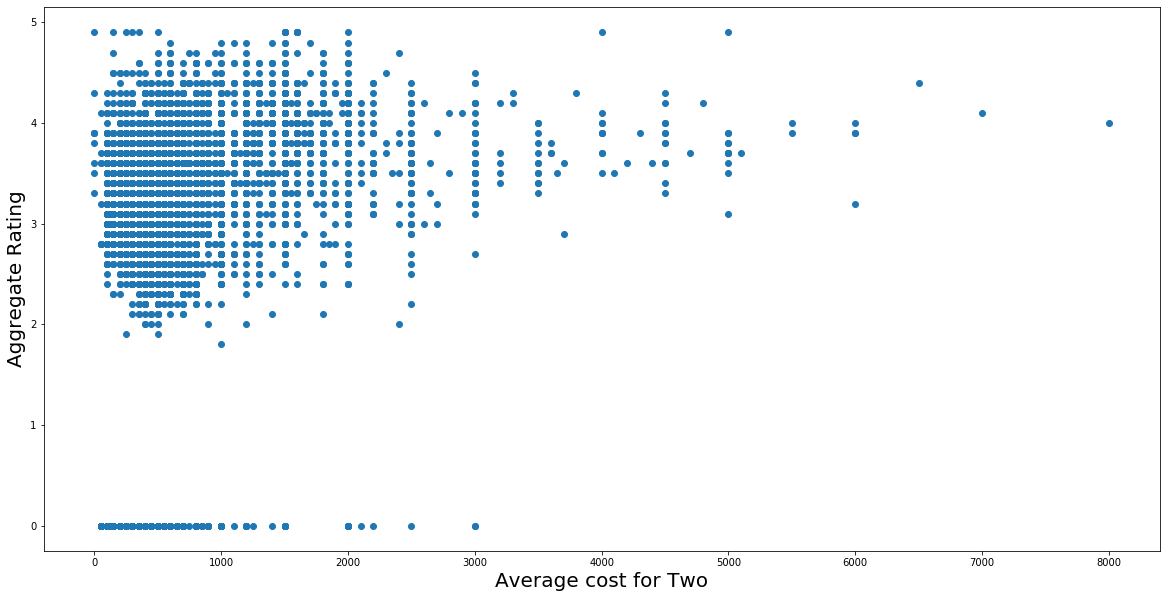

In [15]:
l=list(zip(data_india['Aggregate rating'],data_india['Average Cost for two']))
x=[]
y=[]
for i in range(len(l)):
    x.append(l[i][0])
    y.append(l[i][1])
plt.subplots(figsize=(20,10))
plt.xlabel('Average cost for Two', fontsize=20)
plt.ylabel('Aggregate Rating', fontsize=20)
plt.scatter(y,x)
plt.show()

## Question 2.1.4

In [17]:
data_india['Cuisines'].value_counts()
d={}
for ele in data_india['Cuisines']:
    li=[x.strip() for x in ele.split(',')]
    for v in li:
        d[v]=d.get(v,0)+1
        
d=dict(sorted(d.items(),key= lambda kv :(kv[1],kv[0]),reverse=True))
i=0
cuisines=[]

print('---------------------------------------------------------------------------------------------------------------')
print('TOP 15 CUISINES SERVED IN MOST RESTAURANTS OF INDIA ')

for ele in d:
    if i==15:
        break
    cuisines.append(ele)
    print('{:<16s}|{:>11d}'.format(ele,d[ele]))
    i+=1
print('---------------------------------------------------------------------------------------------------------------')
  


---------------------------------------------------------------------------------------------------------------
TOP 15 CUISINES SERVED IN MOST RESTAURANTS OF INDIA 
North Indian    |       3946
Chinese         |       2690
Fast Food       |       1963
Mughlai         |        992
Bakery          |        726
Continental     |        724
Italian         |        682
South Indian    |        631
Cafe            |        627
Desserts        |        597
Street Food     |        554
Mithai          |        380
Pizza           |        313
American        |        225
Ice Cream       |        216
---------------------------------------------------------------------------------------------------------------


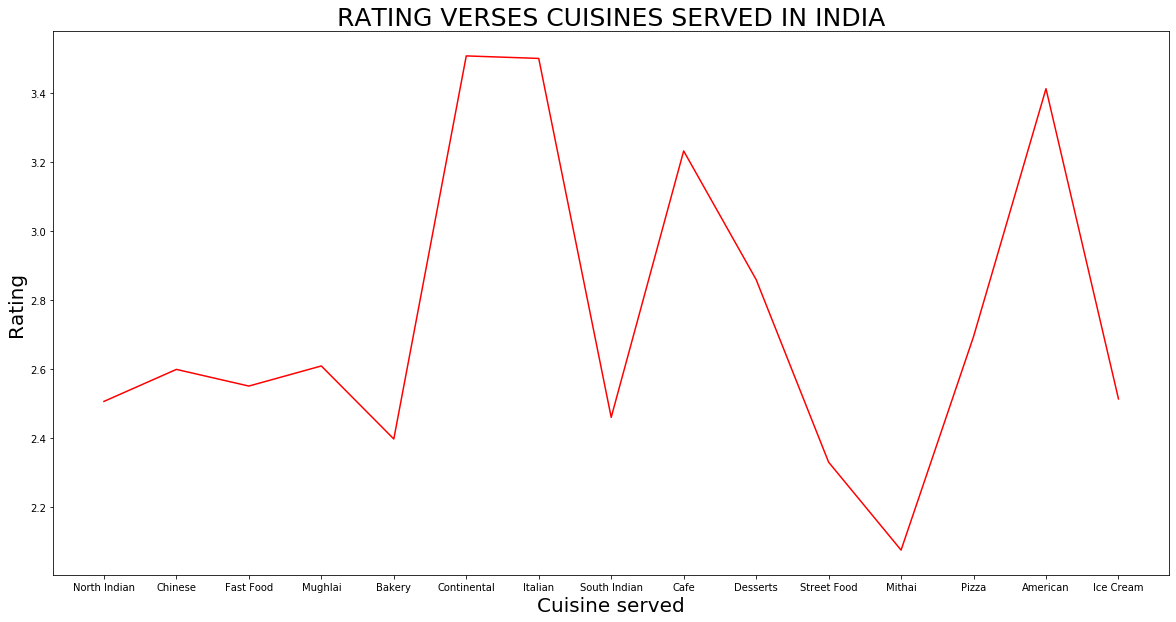

In [18]:
l=list(zip(data_india['Cuisines'],data_india['Aggregate rating']))
d={}
for curr in cuisines:
    sum=0
    count=0
    for i in range(len(l)):
        if curr in l[i][0]:
            sum+=l[i][1]
            count+=1
    d[curr]=(sum/count)
x=[]
y=[]
for curr in d:
    x.append(curr)
    y.append(d[curr])
plt.subplots(figsize=(20,10))
plt.title('RATING VERSES CUISINES SERVED IN INDIA', fontsize=25)
plt.xlabel('Cuisine served', fontsize=20)
plt.ylabel('Rating', fontsize=20)
plt.plot(x,y,color='red')
plt.show()

## Question 2.2.1 

---------------------------------------------------------------------------------------------
                          TOP 10 LOCALITIES HAVING BEST RATING                               

Hotel Clarks Amer, Malviya Nagar        |            4.90
Aminabad                                |            4.90
Friends Colony                          |            4.89
Powai                                   |            4.84
Kirlampudi Layout                       |            4.82
Express Avenue Mall,  Royapettah        |            4.80
Deccan Gymkhana                         |            4.80
Banjara Hills                           |            4.72
Sector 5, Salt Lake                     |            4.71
Riverside Mall, Gomti Nagar             |            4.70
---------------------------------------------------------------------------------------------


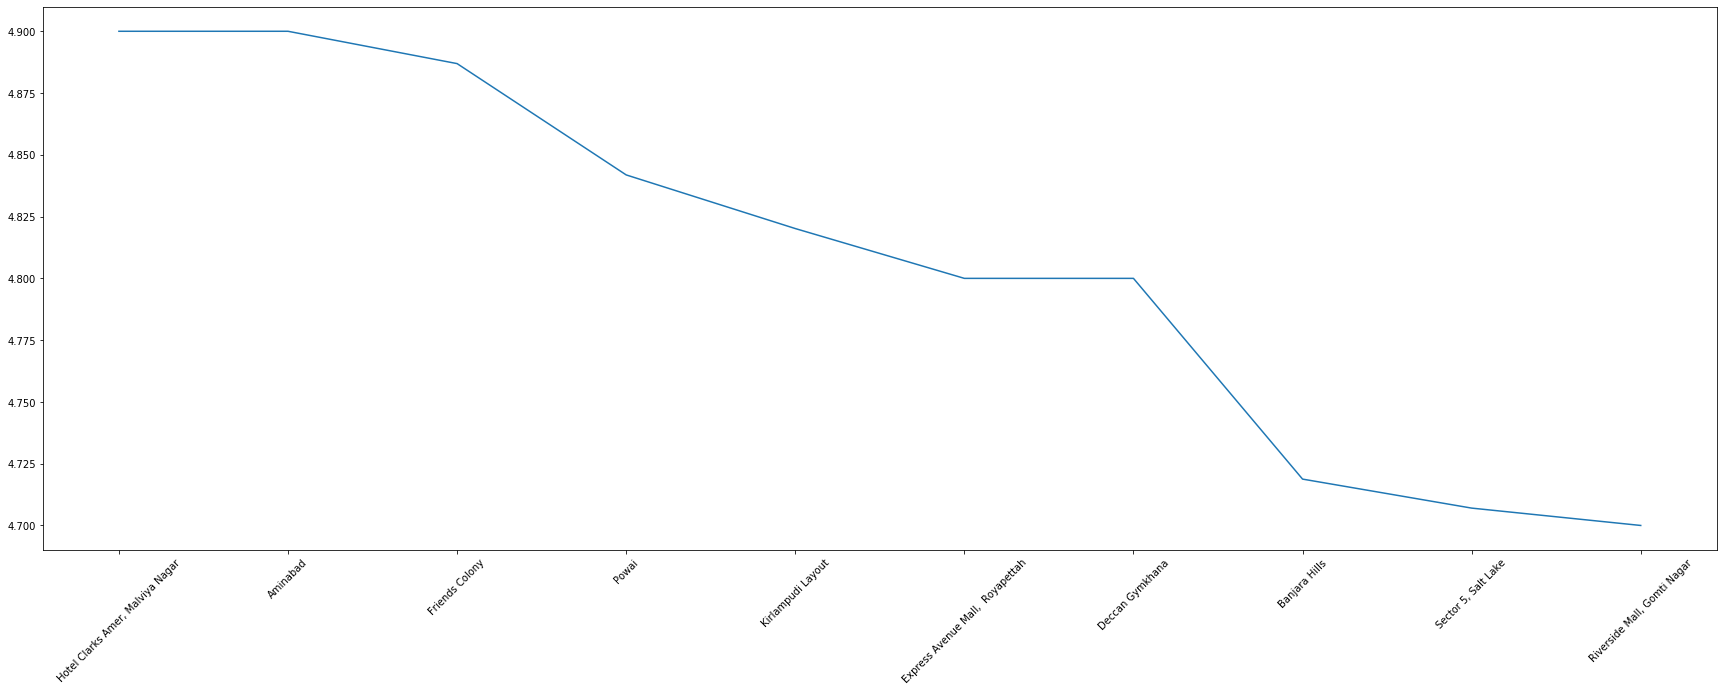

In [27]:
data_india=data_india.copy()
data_india['weighted_average']=data_india['Votes']*data_india['Aggregate rating']
l=list(zip(data_india['Locality'],data_india['weighted_average']))
s=data_india['Votes'].sum()
d={}
ind=[ele[0] for ele in l]
for val in ind:
    key=data_india[data_india['Locality']==val]['weighted_average'].sum()
    v=data_india[data_india['Locality']==val]['Votes'].sum()
    if v==0:
        continue
    d[val]=(key/v)

d=dict(sorted(d.items(),key= lambda kv:(kv[1],kv[0]),reverse=True))
i=0
print('---------------------------------------------------------------------------------------------')
print('                          TOP 10 LOCALITIES HAVING BEST RATING                               ')
print()
x=[]
y=[]
for key in d:
    if i==10:
        break
    x.append(key)
    y.append(d[key])
    print('{:<40s}|{:>16s}'.format(key,'{:.2f}'.format(d[key])))
    i+=1
print('---------------------------------------------------------------------------------------------')


plt.subplots(figsize=(30,10))
plt.plot(x,y)
plt.xticks(rotation=45)
plt.show()

## Question 3.1 

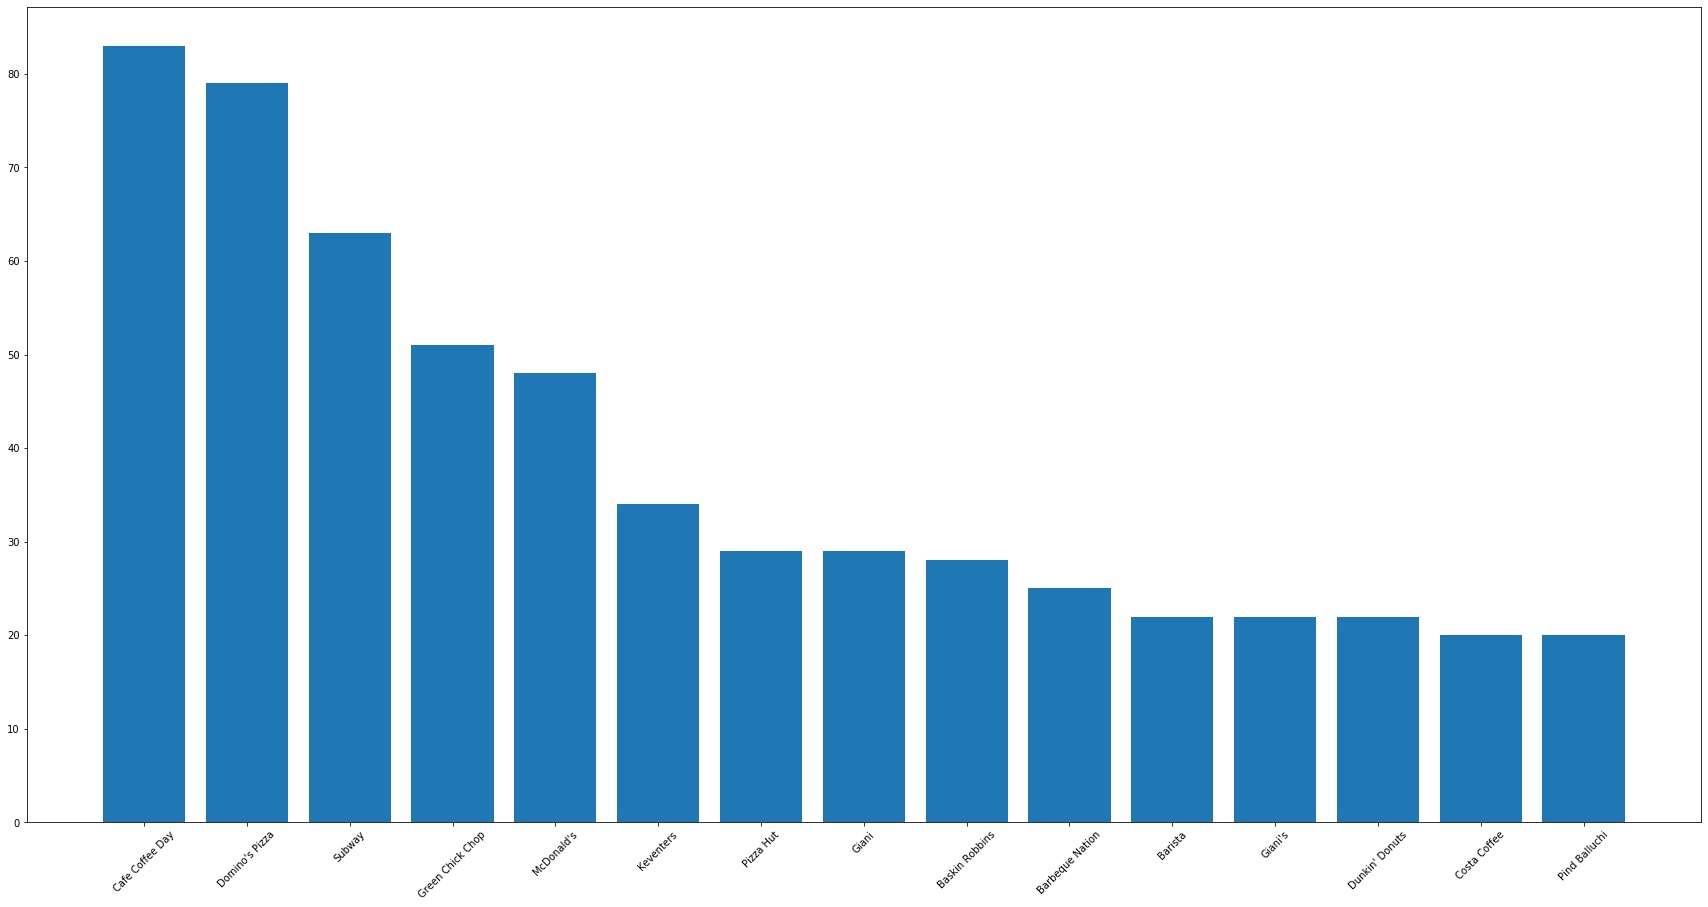

In [19]:
d=data_india['Restaurant Name'].value_counts()
x=list(d.index[0:15])
y=list(d.values[0:15])
plt.subplots(figsize=(30,15))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

## Question 3.2 

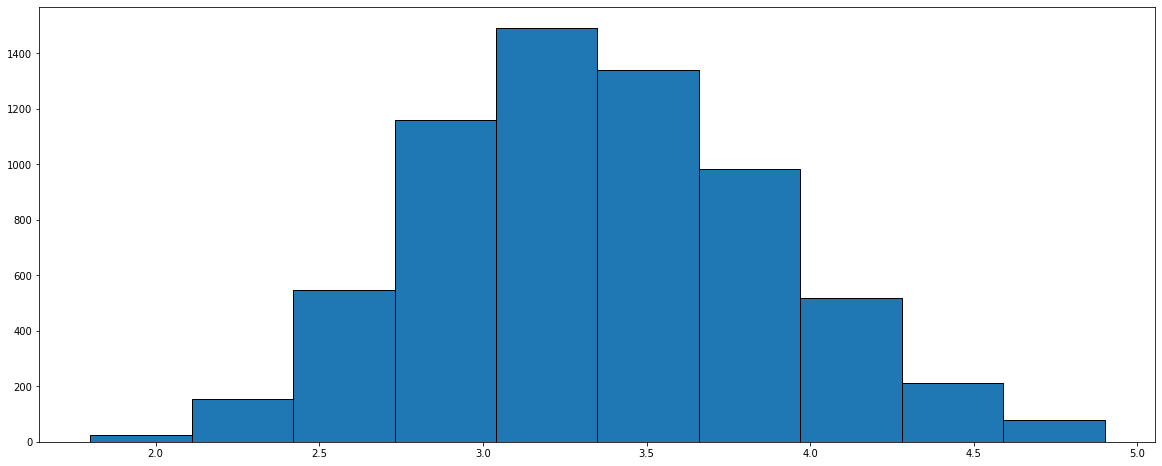

In [20]:
data=data_india[data_india['Aggregate rating']!=0]
x=list(data['Aggregate rating'])
plt.subplots(figsize=(20,8))
plt.hist(x,edgecolor='black')
plt.show()

## Question 3.3

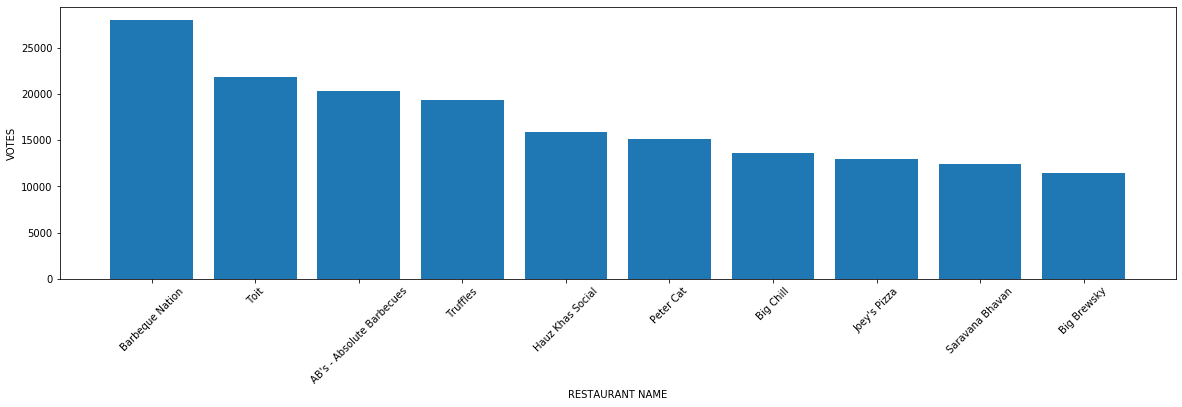

In [21]:
l=list(zip(data_india['Restaurant Name'],data_india['Votes']))
d={}
for i in range(len(l)):
    d[l[i][0]]=d.get(l[i][0],l[i][1])+l[i][1]
d=dict(sorted(d.items(),key=lambda kv:(kv[1],kv[0]),reverse=True))
x=list(d.values())[0:10]
y=list(d.keys())[0:10]
plt.subplots(figsize=(20,5))
plt.bar(y,x)
plt.xlabel('RESTAURANT NAME')
plt.ylabel('VOTES')
plt.xticks(rotation=45)
plt.show()

## Question 3.4

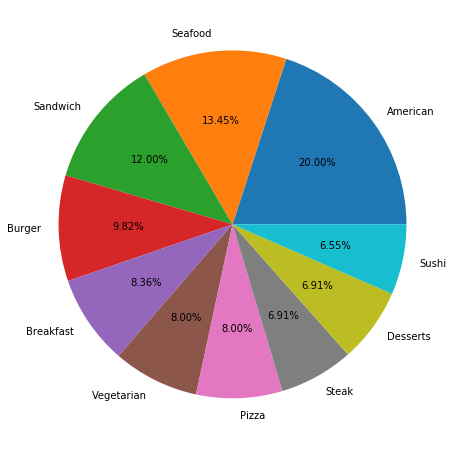

In [23]:
d=df[df['Country Code']==216]
x=d['Cuisines'].value_counts()
dic={}
for ele in list(x.index):
    li=[y.strip() for y in ele.split(',')]
    for y in li:
        dic[y]=dic.get(y,0)+1
dic=dict(sorted(dic.items(),key=lambda kv:(kv[1],kv[0]),reverse=True))
y=list(dic.values())[0:10]
x=list(dic.keys())[0:10]
plt.subplots(figsize=(20,8))
plt.pie(y,labels=x,autopct='%.2f%%')
plt.show()

## Question 3.5

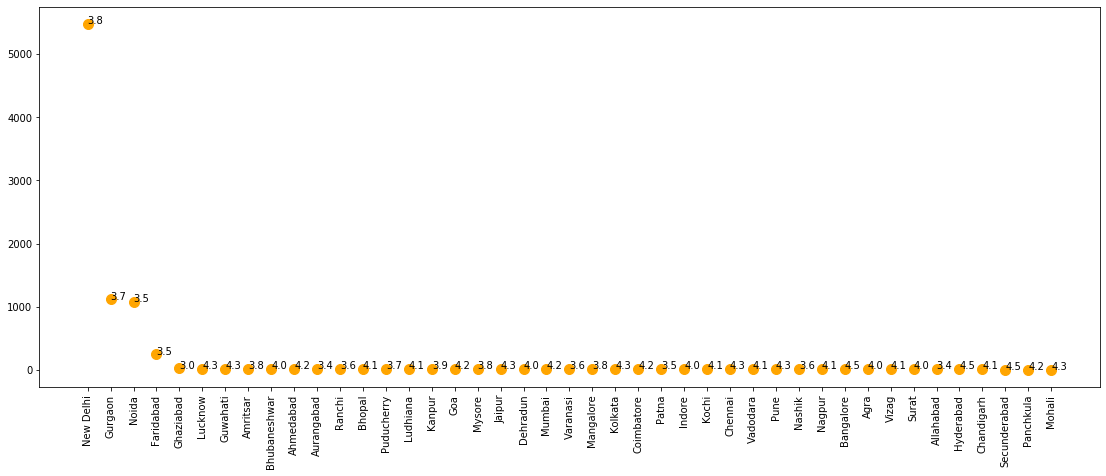

In [28]:
li=data_india['City'].value_counts()
x=list(li.index)
y=list(li.values)
z=[]
d={}
for ele in x:
    a=data_india[data_india['City']==ele]['weighted_average'].sum()
    b=data_india[data_india['City']==ele]['Votes'].sum()
    val=(a/b)
    z.append(val)
    d[ele]=d.get(ele,val)+val
for ele in d:
    d[ele]=round(d[ele],1)
plt.subplots(figsize=(19,7))
plt.scatter(x,y,s=100,color='orange')
plt.xticks(rotation=90)
for i in range(len(x)):
    plt.text(x[i],y[i],round(z[i],1))
plt.show()